# Aula 1 - Análise de Dados

## Biblioteca para análise de dados

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Bibliotecas para gráficos

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
pip  install plotly

In [5]:
import pandas as pd

In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt

In [55]:

import plotly.io as pio

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

## Visualização do CSV dos dados de salario de Analista de Dados

In [9]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


## Visualização mais condensada do CSV

In [10]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  str    
 2   employment_type     133349 non-null  str    
 3   job_title           133349 non-null  str    
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  str    
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  str    
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  str    
 10  company_size        133349 non-null  str    
dtypes: float64(1), int64(3), str(7)
memory usage: 11.2 MB


## Descrição aprofundada das informações númericas.

In [11]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


## Dimensão do arquivo.(quantidade de linhas e colunas)

In [12]:
linhas , colunas = df.shape[0], df.shape[1]
print(f"linhas:" , linhas)
print(f"colunas:" , colunas)

linhas: 133349
colunas: 11


## Quantidade de vagas por nível de experiência

*   **SE** - SÊNIOR
*   **MI** - MEDIUM
*   **EN** - ENTREY-LEVEL
*   **EX** - EXECUTIVE

In [13]:
df["experience_level"].value_counts()

experience_level
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

## Tipo de emprego/contrato


*   **FT** - FULLTIME
*   **CT** - TEMPORARY CONTRACT
*   **PT** - PART TIME
*   **FL**- FREELANCER





In [14]:
df["employment_type"].value_counts()

employment_type
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

## Modalidade de trabalho


In [15]:
df["remote_ratio"].value_counts()

remote_ratio
0      105312
100     27718
50        319
Name: count, dtype: int64

## Quantidade de cargos na área de dados ocupados.

In [16]:
df["job_title"].value_counts()

job_title
Data Scientist              17314
Software Engineer           15007
Data Engineer               14868
Data Analyst                12381
Engineer                     9456
                            ...  
Deep Learning Researcher        1
Marketing Data Engineer         1
Data Science Tech Lead          1
Principal Data Architect        1
Cloud Data Architect            1
Name: count, Length: 390, dtype: int64

#

# Aula 2 - Análise de Dados

## Tratando os dados
Identificação de dados ausentes: Verificamos a existência de valores nulos no conjunto de dados. Observa-se que a coluna `work_year` apresenta 10 registros sem informação.



In [17]:
df.isnull().sum()

work_year             10
experience_level       0
employment_type        0
job_title              0
salary                 0
salary_currency        0
salary_in_usd          0
employee_residence     0
remote_ratio           0
company_location       0
company_size           0
dtype: int64

In [18]:
df["work_year"].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

Realizamos a remoção dos registros nulos identificados anteriormente. A verificação abaixo confirma que o novo DataFrame, `df_limpo`, não possui mais valores faltantes.

In [19]:
df_limpo = df.dropna()
df_limpo.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Ajuste de Tipagem e Visualização:
Convertemos a coluna work_year para o tipo inteiro (int64), garantindo a consistência numérica para futuras análises temporais. Abaixo, apresentamos as primeiras linhas do DataFrame df_limpo para validar a estrutura final dos dados.

In [20]:
df_limpo = df_limpo.assign(work_year = df_limpo["work_year"].astype("int64"))
df_limpo.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


# Aula 3 - Análise de Dados

## Criando gráficos para melhor visualição dos dados

### Análise da Distribuição de Senioridade

O gráfico apresenta a quantidade de vagas disponíveis para analistas de dados em cada nível de senioridade.

<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='experience_level'>

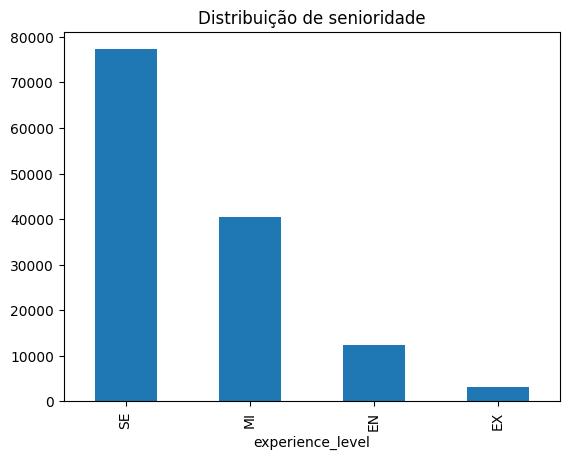

In [21]:
df_limpo["experience_level"].value_counts().plot(kind="bar", title ="Distribuição de senioridade") 

### Análise de Salário Médio por Nível de Senioridade

O gráfico apresenta a relação entre o nível de experiência profissional e o salário médio anual em USD para analistas de dados.

**Interpretação dos Dados:**

- **EN (Entry-Level)**: Profissionais iniciantes apresentam o menor salário médio, refletindo a falta de experiência no mercado.
- **MI (Medium/Intermediário)**: Há um aumento significativo no salário médio, indicando que profissionais com experiência intermediária recebem remuneração consideravelmente maior.
- **SE (Sênior)**: Profissionais sênior ganham notavelmente mais que os níveis anteriores, consolidando a importância da experiência.
- **EX (Executive)**: Cargos executivos apresentam o maior salário médio, representando o topo da hierarquia salarial.

**Conclusão:**

O gráfico demonstra uma progressão clara e positiva dos salários conforme aumenta o nível de senioridade, confirmando que a experiência e o expertise são fatores determinantes na remuneração dentro da área de análise de dados.

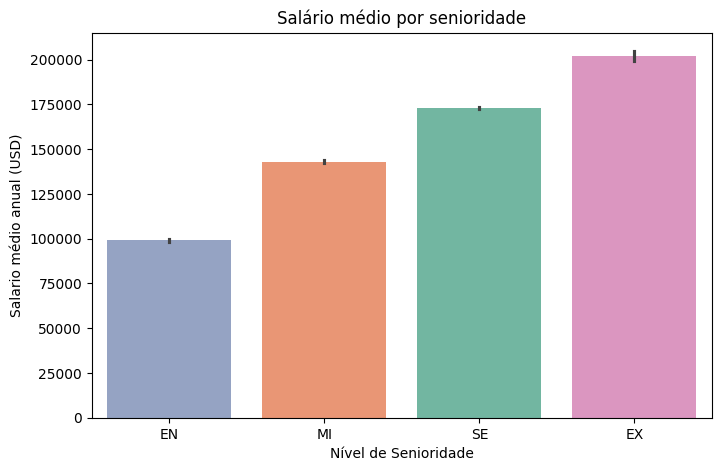

In [36]:
ordem = df_limpo.groupby("experience_level")["salary_in_usd"].mean().sort_values(ascending=True).index
plt.figure(figsize=(8,5))
sns.barplot(data = df_limpo, x = "experience_level", y = "salary_in_usd", order = ordem, palette="Set2", hue= "experience_level")
plt.title("Salário médio por senioridade")
plt.xlabel("Nível de Senioridade")
plt.ylabel("Salario médio anual (USD)")
plt.show()

### Análise da Distribuição de Salários

Abixo um histograma que visualiza a distribuição dos salários anuais em USD para os analistas de dados;

Este histograma permite identificar a concentração de salários, detectar outliers e compreender melhor a faixa salarial predominante na área de análise de dados.

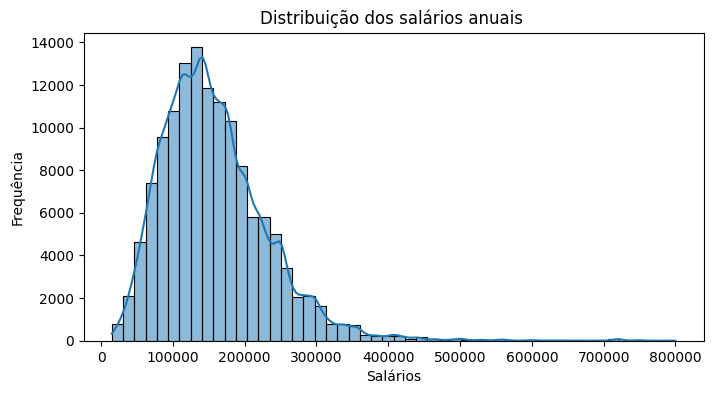

In [33]:
plt.figure(figsize=(8,4))
sns.histplot(df_limpo["salary_in_usd"], bins = 50, kde=True)
plt.title("Distribuição dos salários anuais ")
plt.xlabel("Salários")
plt.ylabel("Frequência")
plt.show()

### 📊 Salário Médio por Senioridade

Este gráfico mostra o **salário médio (em USD)** de profissionais da área de dados de acordo com o **nível de senioridade**.

É possível observar que, conforme o nível de experiência aumenta, o **salário médio também cresce**, indicando uma relação direta entre senioridade e remuneração.

O gráfico é interativo, permitindo visualizar os valores ao passar o mouse sobre as barras.


In [85]:


ordem_list = ordem.tolist()
salario_medio = df_limpo.groupby("experience_level")["salary_in_usd"].mean().reindex(ordem_list)

fig = px.bar(
    x=salario_medio.index,
    y=salario_medio.values,
    labels={"x": "Nível de Senioridade", "y": "Salário Médio (USD)"},
    title="Salário Médio por Senioridade",
    color=salario_medio.index,
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'color=EN<br>Nível de Senioridade=%{x}<br>Salário Médio (USD)=%{y}<extra></extra>',
              'legendgroup': 'EN',
              'marker': {'color': 'rgb(102,194,165)', 'pattern': {'shape': ''}},
              'name': 'EN',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['EN'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': '+EGKaa8t+EA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'color=MI<br>Nível de Senioridade=%{x}<br>Salário Médio (USD)=%{y}<extra></extra>',
              'legendgroup': 'MI',
              'marker': {'color': 'rgb(252,141,98)', 'pattern': {'shape': ''}},
              'name': 'MI',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['MI'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'sZuQxCZ2AUE=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'color=SE<br>Nível de Senioridade=%{x}<br>Salário Médio (USD)=%{y}<extra></extra>',
              'legendgroup': 'SE',
              'marker': {'color': 'rgb(141,160,203)', 'pattern': {'shape': ''}},
              'name': 'SE',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['SE'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'vAvXtJYZBUE=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'color=EX<br>Nível de Senioridade=%{x}<br>Salário Médio (USD)=%{y}<extra></extra>',
              'legendgroup': 'EX',
              'marker': {'color': 'rgb(231,138,195)', 'pattern': {'shape': ''}},
              'name': 'EX',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['EX'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'exSuV12pCEE=', 'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'color'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Salário Médio por Senioridade'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Nível de Senioridade'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Salário Médio (USD)'}}}
})

### Análise de Salário Médio de Cientista de Dados por País

Este gráfico apresenta uma comparação dos salários médios anuais em USD para profissionais com a função de **Cientista de Dados**, organizados por país/localidade da empresa.

**Interpretação dos Dados:**

- **Países com Menores Salários**: Países como Equador (EC), Taiwan (TW) e Hungria (HU) apresentam os menores salários médios para cientistas de dados, refletindo diferenças no custo de vida e desenvolvimento tecnológico regional.

- **Países com Salários Intermediários**: Localidades como Brasil (BR), Países Baixos (NL) e Reino Unido (GB) mostram salários moderados, indicando mercados em desenvolvimento ou com custo de vida intermediário.

- **Países com Maiores Salários**: Estados Unidos (US), Singapura (SG) e Bulgária (BG) apresentam os maiores salários médios, consolidando-se como mercados mais competitivos e com maior demanda por profissionais especializados.

**Conclusão:**

O gráfico evidencia uma **disparidade significativa** nos salários de cientistas de dados entre diferentes países, influenciada por fatores como economia local, demanda de mercado, custo de vida e nível de desenvolvimento tecnológico. Profissionais em mercados anglo-saxões e asiáticos desenvolvidos tendem a receber remuneração consideravelmente superior aos demais.

C:\Users\ivirt\AppData\Local\Temp\ipykernel_7492\1866504657.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




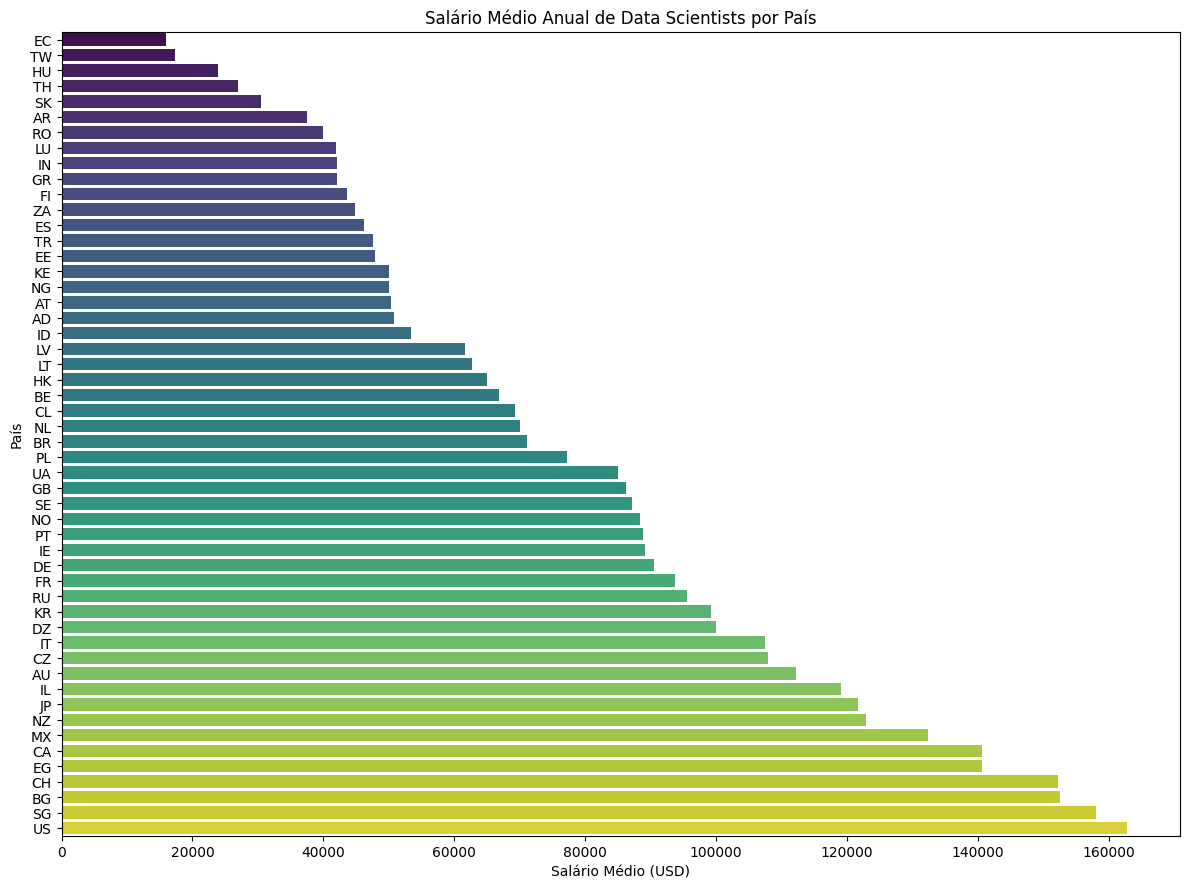

In [ ]:
salario_data_science = df_limpo[df_limpo["job_title"] == "Data Scientist"].groupby("company_location")["salary_in_usd"].mean().sort_values(ascending=True)

plt.figure(figsize=(12, 9))
sns.barplot(x=salario_data_science.values, y=salario_data_science.index, palette="viridis", hue = "company_location")
plt.title("Salário Médio Anual de Cientista de Dados por País")
plt.xlabel("Salário Médio (USD)")
plt.ylabel("País")
plt.tight_layout()
plt.show()